# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

from sklearn.preprocessing import (
    OneHotEncoder, Binarizer, KBinsDiscretizer,
    MinMaxScaler, StandardScaler, PolynomialFeatures
)

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.datasets import load_digits, fetch_20newsgroups
from sklearn.feature_extraction.text import (
    CountVectorizer, TfidfTransformer, TfidfVectorizer
)

In [2]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
countries = pd.read_csv("countries.csv")

In [4]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [5]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           227 non-null    object 
 1   Region            227 non-null    object 
 2   Population        227 non-null    int64  
 3   Area              227 non-null    int64  
 4   Pop_density       227 non-null    object 
 5   Coastline_ratio   227 non-null    object 
 6   Net_migration     224 non-null    object 
 7   Infant_mortality  224 non-null    object 
 8   GDP               226 non-null    float64
 9   Literacy          209 non-null    object 
 10  Phones_per_1000   223 non-null    object 
 11  Arable            225 non-null    object 
 12  Crops             225 non-null    object 
 13  Other             225 non-null    object 
 14  Climate           205 non-null    object 
 15  Birthrate         224 non-null    object 
 16  Deathrate         223 non-null    object 
 1

## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [6]:
# Sua análise começa aqui.

In [7]:
for column in new_column_names[4:]:
    countries[column] = countries[column].apply(lambda x: str(x).replace(',','.'))
    countries[column] = countries[column].astype(float)

In [8]:
countries.Region = countries.Region.apply(lambda x : x.strip())
countries.Country = countries.Country.apply(lambda x : x.strip())

In [9]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           227 non-null    object 
 1   Region            227 non-null    object 
 2   Population        227 non-null    int64  
 3   Area              227 non-null    int64  
 4   Pop_density       227 non-null    float64
 5   Coastline_ratio   227 non-null    float64
 6   Net_migration     224 non-null    float64
 7   Infant_mortality  224 non-null    float64
 8   GDP               226 non-null    float64
 9   Literacy          209 non-null    float64
 10  Phones_per_1000   223 non-null    float64
 11  Arable            225 non-null    float64
 12  Crops             225 non-null    float64
 13  Other             225 non-null    float64
 14  Climate           205 non-null    float64
 15  Birthrate         224 non-null    float64
 16  Deathrate         223 non-null    float64
 1

In [10]:
countries.isna().sum()

Country              0
Region               0
Population           0
Area                 0
Pop_density          0
Coastline_ratio      0
Net_migration        3
Infant_mortality     3
GDP                  1
Literacy            18
Phones_per_1000      4
Arable               2
Crops                2
Other                2
Climate             22
Birthrate            3
Deathrate            4
Agriculture         15
Industry            16
Service             15
dtype: int64

In [11]:
countries["Climate"].nunique()

6

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [40]:
def q1():
    region = countries['Region'].unique()    
    region.sort()
    
    return list(region)

q1()

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [41]:
discretizer = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")
discretizer.fit(countries[["Pop_density"]])
pop_density_bins = discretizer.transform(countries[["Pop_density"]])
    
#Os limites dos intervalos estão disponíveis no atributo bin_edges_. Será útil para criar labels para colunas do data set 
discretizer.bin_edges_ 

def get_interval(bin_idx, bin_edges):
  return f"{np.round(bin_edges[bin_idx], 2):.2f} ⊢ {np.round(bin_edges[bin_idx+1], 2):.2f}"

bin_edges_quantile = discretizer.bin_edges_[0]

print(f"Bins quantile")
print(f"interval: #elements\n")
for i in range(len(discretizer.bin_edges_[0])-1):
    print(f"{get_interval(i, bin_edges_quantile)}: {sum(pop_density_bins[:, 0] == i)}")

    
def q2():
    return int(sum(pop_density_bins[:, 0] == 9))
    
q2()

Bins quantile
interval: #elements

0.00 ⊢ 10.14: 23
10.14 ⊢ 21.22: 23
21.22 ⊢ 39.48: 22
39.48 ⊢ 59.80: 23
59.80 ⊢ 78.80: 22
78.80 ⊢ 105.54: 23
105.54 ⊢ 150.12: 23
150.12 ⊢ 253.70: 22
253.70 ⊢ 396.74: 23
396.74 ⊢ 16271.50: 23


23

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [14]:
#Climate's column has values as Nan.
#countries["Climate"].value_counts()

In [15]:
#I chose to fill with value more frequent (2.0)

#countries["Climate"] = countries["Climate"].fillna(2.0)
#countries["Climate"].isna().sum()

In [16]:
#countries[["Region","Climate"]].nunique()

In [17]:
# def q3():
    #one_hot_encoder = OneHotEncoder(sparse=False, dtype=np.int)
    #one_hot_encoder.fit(countries[["Region","Climate"]])
    #columns_encoded = one_hot_encoder.transform(countries[["Region","Climate"]])
    #return columns_encoded.shape[1]

#q3()

In [18]:
def q3():
    countries["Climate"] = countries['Climate'].fillna(0)
    one_hot_encoder = OneHotEncoder(sparse=False)
    columns_encoded = one_hot_encoder.fit_transform(countries[["Region","Climate"]])
    return int(columns_encoded.shape[1])

q3()

18

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [19]:
#columns int64 and float 64
columns = countries.columns[2:].tolist()

In [20]:
countries[columns].head()

,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [21]:
num_pipeline = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")),
                               ("standard_scaler", StandardScaler())
                              ])

In [22]:
pipeline_transformation = num_pipeline.fit_transform(countries[columns])

In [23]:
pipeline_transformation

array([[ 0.01969468,  0.02758332, -0.19984434, ...,  1.63657562,
        -0.31540576, -1.1611354 ],
       [-0.21387688, -0.31879748, -0.15360296, ...,  0.59516349,
        -0.70631815,  0.08342432],
       [ 0.03561811,  0.99842051, -0.22048996, ..., -0.32662697,
         2.39091078, -1.67396905],
       ...,
       [-0.06192308, -0.03933023, -0.20431152, ..., -0.08738364,
         1.4286649 , -1.0798325 ],
       [-0.14654488,  0.08642673, -0.21958445, ...,  0.51072467,
         0.06047154, -0.47944188],
       [-0.14029829, -0.11624192, -0.20992568, ...,  0.22222537,
        -0.29285312,  0.08342432]])

In [24]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [25]:
test_pd = pd.DataFrame(data=[test_country], columns=countries.columns)
test_pd

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Test Country,NEAR EAST,-0.190325,-0.323264,-0.044217,-0.275281,0.132559,-0.805485,1.011978,0.618918,1.007486,0.202399,-0.043679,-0.139297,1.31636,-0.369964,-0.61493,-0.85437,0.263445,0.571242


In [26]:
test_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           1 non-null      object 
 1   Region            1 non-null      object 
 2   Population        1 non-null      float64
 3   Area              1 non-null      float64
 4   Pop_density       1 non-null      float64
 5   Coastline_ratio   1 non-null      float64
 6   Net_migration     1 non-null      float64
 7   Infant_mortality  1 non-null      float64
 8   GDP               1 non-null      float64
 9   Literacy          1 non-null      float64
 10  Phones_per_1000   1 non-null      float64
 11  Arable            1 non-null      float64
 12  Crops             1 non-null      float64
 13  Other             1 non-null      float64
 14  Climate           1 non-null      float64
 15  Birthrate         1 non-null      float64
 16  Deathrate         1 non-null      float64
 17  A

In [27]:
#columns int64 and float 64
columns_test = test_pd.columns[2:].tolist()
columns_test

['Population',
 'Area',
 'Pop_density',
 'Coastline_ratio',
 'Net_migration',
 'Infant_mortality',
 'GDP',
 'Literacy',
 'Phones_per_1000',
 'Arable',
 'Crops',
 'Other',
 'Climate',
 'Birthrate',
 'Deathrate',
 'Agriculture',
 'Industry',
 'Service']

In [28]:
numeric_features = test_pd[columns_test]

In [29]:
test_transform = num_pipeline.transform(numeric_features)
test_transform

array([[-0.24432501, -0.33489095, -0.22884735, -0.29726002,  0.01959086,
        -1.02861728, -0.96623348, -4.35427242, -1.03720972, -1.04685743,
        -0.55058149, -5.10112169, -0.67138971, -2.02455164, -1.99092137,
        -7.04915046, -0.13915481,  0.03490335]])

In [30]:
numeric_features.columns[9]

'Arable'

In [31]:
def q4():
    return float(round(test_transform[0][9], 3))

q4()

-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

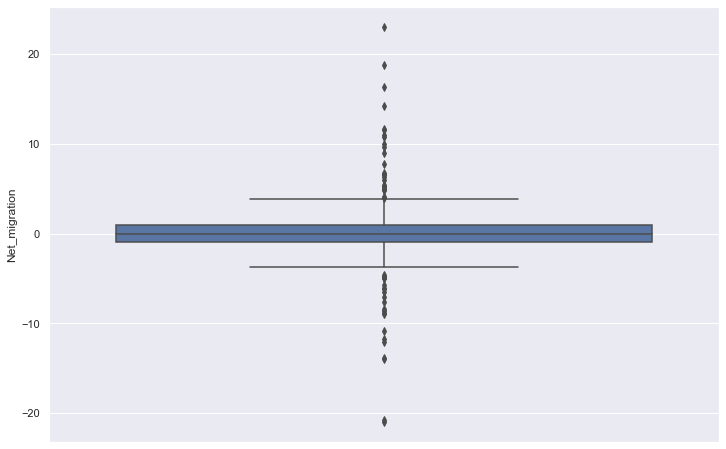

In [32]:
sns.boxplot(countries['Net_migration'], orient="vertical")

In [33]:
quantile_1 = countries['Net_migration'].quantile(0.25)
quantile_3 = countries['Net_migration'].quantile(0.75)
iqr = quantile_3 - quantile_1
print("q1 = {}, q3 = {} and IQR = {}".format(quantile_1, quantile_3, iqr))

q1 = -0.9275, q3 = 0.9974999999999999 and IQR = 1.9249999999999998


In [34]:
non_outlier_interval_iqr = [quantile_1 - 1.5 * iqr, quantile_3 + 1.5 * iqr]

print(f"Faixa considerada \"normal\": {non_outlier_interval_iqr}")

Faixa considerada "normal": [-3.8149999999999995, 3.885]


In [35]:
outliers_above = countries['Net_migration'][(countries['Net_migration'] > non_outlier_interval_iqr[1])]
outliers_below = countries['Net_migration'][(countries['Net_migration'] < non_outlier_interval_iqr[0])]

In [36]:
#I chose not remove the outliers, because is normal to be values very different in each countries. 

def q5():
    return (int(len(outliers_below)), int(len(outliers_above)), False)

q5()

(24, 26, False)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

OBS: 

Quando trabalhando com dados textuais, uma representação simples é ter:

Cada documento em uma linha.
Cada palavra (ou termo) em uma coluna.
Por exemplo, se nosso vocábulário (conjunto de todas palavras ou termos do corpus_) tiver tamanho 10000 e tivermos 100 documentos, então nosso _data set será composto de 100 linhas e 10000 colunas.

O valor de cada célula,  𝑥𝑖,𝑗 , (interseção da linha  𝑖  com a coluna  𝑗 ) do data set depende da tranformação que aplicarmos.

A transformação mais simples é a contagem de palavras no documento, ou seja,  𝑥𝑖,𝑗  indica o número de ocorrências da palavra  𝑗  no documento  𝑖 .

Isso pode ser obtido no sklearn pelo CountVectorizer:

In [37]:
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
print("total de documentos: ",len(newsgroup.data))

total de documentos:  1773


In [38]:
def q6():
    count_vectorizer = CountVectorizer()
    newsgroups_counts = count_vectorizer.fit_transform(newsgroup.data)
    #print(newsgroups_counts)
    
    index_phone = count_vectorizer.vocabulary_.get('phone')
        
    return int(sum(newsgroups_counts[:, index_phone].toarray())[0])

q6()

213

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [39]:
def q7():
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_vectorizer.fit(newsgroup.data)
    newsgroups_tfidf_vectorized = tfidf_vectorizer.transform(newsgroup.data)
    
    index_phone_tfidf = tfidf_vectorizer.vocabulary_['phone']
    column_phone = newsgroups_tfidf_vectorized[:, index_phone_tfidf]

    newsgroups_tfidf_vectorized[column_phone.toarray() > 0]

    return float(round(column_phone.toarray().sum(), 3))

q7()

8.888